<a href="https://colab.research.google.com/github/Abhishek-Singh0914/Flight-Price-Prediction/blob/main/Flight_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor


In [3]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [57]:
train_df=pd.read_csv('/content/Flight_data.csv')
# test_df=pd.read_csv('/content/Flight_data.csv')

In [5]:
train_df.head()

,Unnamed: 0,airline,from,to,price,class_category,class,day,month,flight_no,...,airline_index,route_index,duration_in_min,stops,stops_category,arr_daytime,arr_daytime_category,dep_daytime,dep_daytime_category,month_category
0,0,SpiceJet,Delhi,Mumbai,5953,Economy,0,11,2,SG-8709,...,4,14,130,0,Non-stop,0,Night Arrival,1,Daytime Departure,February
1,1,SpiceJet,Delhi,Mumbai,5953,Economy,0,11,2,SG-8157,...,4,14,140,0,Non-stop,1,Daytime Arrival,1,Daytime Departure,February
2,2,AirAsia,Delhi,Mumbai,5956,Economy,0,11,2,I5-764,...,1,14,130,0,Non-stop,1,Daytime Arrival,0,Night Departure,February
3,3,Vistara,Delhi,Mumbai,5955,Economy,0,11,2,UK-995,...,7,14,135,0,Non-stop,1,Daytime Arrival,1,Daytime Departure,February
4,4,Vistara,Delhi,Mumbai,5955,Economy,0,11,2,UK-963,...,7,14,140,0,Non-stop,1,Daytime Arrival,1,Daytime Departure,February


In [8]:
test_df.head()

,Unnamed: 0,airline,from,to,price,class_category,class,day,month,flight_no,...,airline_index,route_index,duration_in_min,stops,stops_category,arr_daytime,arr_daytime_category,dep_daytime,dep_daytime_category,month_category
0,0,SpiceJet,Delhi,Mumbai,5953,Economy,0,11,2,SG-8709,...,4,14,130,0,Non-stop,0,Night Arrival,1,Daytime Departure,February
1,1,SpiceJet,Delhi,Mumbai,5953,Economy,0,11,2,SG-8157,...,4,14,140,0,Non-stop,1,Daytime Arrival,1,Daytime Departure,February
2,2,AirAsia,Delhi,Mumbai,5956,Economy,0,11,2,I5-764,...,1,14,130,0,Non-stop,1,Daytime Arrival,0,Night Departure,February
3,3,Vistara,Delhi,Mumbai,5955,Economy,0,11,2,UK-995,...,7,14,135,0,Non-stop,1,Daytime Arrival,1,Daytime Departure,February
4,4,Vistara,Delhi,Mumbai,5955,Economy,0,11,2,UK-963,...,7,14,140,0,Non-stop,1,Daytime Arrival,1,Daytime Departure,February


In [ ]:
train_df = train_df.drop('flight_no',)

In [9]:
import pandas as pd

final_df = pd.concat([train_df, test_df], ignore_index=True)


In [10]:
final_df.head()

,Unnamed: 0,airline,from,to,price,class_category,class,day,month,flight_no,...,airline_index,route_index,duration_in_min,stops,stops_category,arr_daytime,arr_daytime_category,dep_daytime,dep_daytime_category,month_category
0,0,SpiceJet,Delhi,Mumbai,5953,Economy,0,11,2,SG-8709,...,4,14,130,0,Non-stop,0,Night Arrival,1,Daytime Departure,February
1,1,SpiceJet,Delhi,Mumbai,5953,Economy,0,11,2,SG-8157,...,4,14,140,0,Non-stop,1,Daytime Arrival,1,Daytime Departure,February
2,2,AirAsia,Delhi,Mumbai,5956,Economy,0,11,2,I5-764,...,1,14,130,0,Non-stop,1,Daytime Arrival,0,Night Departure,February
3,3,Vistara,Delhi,Mumbai,5955,Economy,0,11,2,UK-995,...,7,14,135,0,Non-stop,1,Daytime Arrival,1,Daytime Departure,February
4,4,Vistara,Delhi,Mumbai,5955,Economy,0,11,2,UK-963,...,7,14,140,0,Non-stop,1,Daytime Arrival,1,Daytime Departure,February


In [11]:
final_df.tail()

,Unnamed: 0,airline,from,to,price,class_category,class,day,month,flight_no,...,airline_index,route_index,duration_in_min,stops,stops_category,arr_daytime,arr_daytime_category,dep_daytime,dep_daytime_category,month_category
53991,26993,Air India,Delhi,Kolkata,3610,Economy,0,22,3,AI-560,...,0,13,1435,1,1-Stop,1,Daytime Arrival,1,Daytime Departure,March
53992,26994,SpiceJet,Delhi,Kolkata,4000,Economy,0,22,3,SG-8263,...,4,13,125,0,Non-stop,1,Daytime Arrival,1,Daytime Departure,March
53993,26995,SpiceJet,Delhi,Kolkata,4000,Economy,0,22,3,SG-8253,...,4,13,130,0,Non-stop,0,Night Arrival,0,Night Departure,March
53994,26996,Vistara,Delhi,Kolkata,4000,Economy,0,22,3,UK-747,...,7,13,125,0,Non-stop,1,Daytime Arrival,1,Daytime Departure,March
53995,26997,Vistara,Delhi,Kolkata,4000,Economy,0,22,3,UK-705,...,7,13,125,0,Non-stop,1,Daytime Arrival,1,Daytime Departure,Marc


In [12]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53996 entries, 0 to 53995
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Unnamed: 0            53996 non-null  int64 
 1   airline               53996 non-null  object
 2   from                  53996 non-null  object
 3   to                    53996 non-null  object
 4   price                 53996 non-null  int64 
 5   class_category        53996 non-null  object
 6   class                 53996 non-null  int64 
 7   day                   53996 non-null  int64 
 8   month                 53996 non-null  int64 
 9   flight_no             53996 non-null  object
 10  route                 53996 non-null  object
 11  dep_hour              53996 non-null  int64 
 12  arr_hour              53996 non-null  int64 
 13  dep_period            53996 non-null  object
 14  arr_period            53996 non-null  object
 15  airline_index         53996 non-null

In [63]:
final_df['day'] = final_df['day'].astype(str)
final_df['day'].str.split('/').str[0]

0        11
1        11
2        11
3        11
4        11
         ..
53991    22
53992    22
53993    22
53994    22
53995    22
Name: day, Length: 53996, dtype: object

In [15]:
final_df.drop('day',axis=1,inplace=True)

In [19]:
final_df.head()

,Unnamed: 0,airline,from,to,price,class_category,class,day,month,flight_no,...,airline_index,route_index,duration_in_min,stops,stops_category,arr_daytime,arr_daytime_category,dep_daytime,dep_daytime_category,month_category
0,0,SpiceJet,Delhi,Mumbai,5953,Economy,0,11,2,SG-8709,...,4,14,130,0,Non-stop,0,Night Arrival,1,Daytime Departure,February
1,1,SpiceJet,Delhi,Mumbai,5953,Economy,0,11,2,SG-8157,...,4,14,140,0,Non-stop,1,Daytime Arrival,1,Daytime Departure,February
2,2,AirAsia,Delhi,Mumbai,5956,Economy,0,11,2,I5-764,...,1,14,130,0,Non-stop,1,Daytime Arrival,0,Night Departure,February
3,3,Vistara,Delhi,Mumbai,5955,Economy,0,11,2,UK-995,...,7,14,135,0,Non-stop,1,Daytime Arrival,1,Daytime Departure,February
4,4,Vistara,Delhi,Mumbai,5955,Economy,0,11,2,UK-963,...,7,14,140,0,Non-stop,1,Daytime Arrival,1,Daytime Departure,February


from matplotlib import pyplot as plt
_df_0['Unnamed: 0'].plot(kind='hist', bins=20, title='Unnamed: 0')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['price'].plot(kind='hist', bins=20, title='price')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['dep_hour'].plot(kind='hist', bins=20, title='dep_hour')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['arr_hour'].plot(kind='hist', bins=20, title='arr_hour')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('airline').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_5.groupby('flight_no').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_6.groupby('dep_period').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_7.groupby('arr_period').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8.plot(kind='scatter', x='Unnamed: 0', y='price', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_9.plot(kind='scatter', x='price', y='dep_hour', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_10.plot(kind='scatter', x='dep_hour', y='arr_hour', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_11.plot(kind='scatter', x='arr_hour', y='airline_index', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Unnamed: 0']
  ys = series['price']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_12.sort_values('Unnamed: 0', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('airline')):
  _plot_series(series, series_name, i)
  fig.legend(title='airline', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Unnamed: 0')
_ = plt.ylabel('price')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Unnamed: 0']
  ys = series['price']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_13.sort_values('Unnamed: 0', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('flight_no')):
  _plot_series(series, series_name, i)
  fig.legend(title='flight_no', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Unnamed: 0')
_ = plt.ylabel('price')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Unnamed: 0']
  ys = series['price']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_14.sort_values('Unnamed: 0', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('dep_period')):
  _plot_series(series, series_name, i)
  fig.legend(title='dep_period', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Unnamed: 0')
_ = plt.ylabel('price')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Unnamed: 0']
  ys = series['price']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_15.sort_values('Unnamed: 0', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('arr_period')):
  _plot_series(series, series_name, i)
  fig.legend(title='arr_period', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Unnamed: 0')
_ = plt.ylabel('price')

from matplotlib import pyplot as plt
_df_16['Unnamed: 0'].plot(kind='line', figsize=(8, 4), title='Unnamed: 0')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_17['price'].plot(kind='line', figsize=(8, 4), title='price')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_18['dep_hour'].plot(kind='line', figsize=(8, 4), title='dep_hour')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_19['arr_hour'].plot(kind='line', figsize=(8, 4), title='arr_hour')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['flight_no'].value_counts()
    for x_label, grp in _df_20.groupby('airline')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('airline')
_ = plt.ylabel('flight_no')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['dep_period'].value_counts()
    for x_label, grp in _df_21.groupby('flight_no')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('flight_no')
_ = plt.ylabel('dep_period')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['arr_period'].value_counts()
    for x_label, grp in _df_22.groupby('dep_period')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('dep_period')
_ = plt.ylabel('arr_period')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['arr_daytime_category'].value_counts()
    for x_label, grp in _df_23.groupby('arr_period')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('arr_period')
_ = plt.ylabel('arr_daytime_category')

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_24['airline'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_24, x='Unnamed: 0', y='airline', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_25['flight_no'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_25, x='Unnamed: 0', y='flight_no', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_26['dep_period'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_26, x='Unnamed: 0', y='dep_period', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_27['arr_period'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_27, x='Unnamed: 0', y='arr_period', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [13]:
final_df.isnull().sum()

Unnamed: 0              0
airline                 0
from                    0
to                      0
price                   0
class_category          0
class                   0
day                     0
month                   0
flight_no               0
route                   0
dep_hour                0
arr_hour                0
dep_period              0
arr_period              0
airline_index           0
route_index             0
duration_in_min         0
stops                   0
stops_category          0
arr_daytime             0
arr_daytime_category    0
dep_daytime             0
dep_daytime_category    0
month_category          0
dtype: int64

In [14]:
final_df.dropna(axis=0,inplace=True)

In [15]:
final_df.isnull().sum()

Unnamed: 0              0
airline                 0
from                    0
to                      0
price                   0
class_category          0
class                   0
day                     0
month                   0
flight_no               0
route                   0
dep_hour                0
arr_hour                0
dep_period              0
arr_period              0
airline_index           0
route_index             0
duration_in_min         0
stops                   0
stops_category          0
arr_daytime             0
arr_daytime_category    0
dep_daytime             0
dep_daytime_category    0
month_category          0
dtype: int64

In [16]:
def plot(data,col):
    fig,(ax1,ax2)=plt.subplots(2,1)
    sns.distplot(data[col],ax=ax1)
    sns.boxplot(data[col],ax=ax2)

<ipython-input-16-34770453dd8a>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col],ax=ax1)


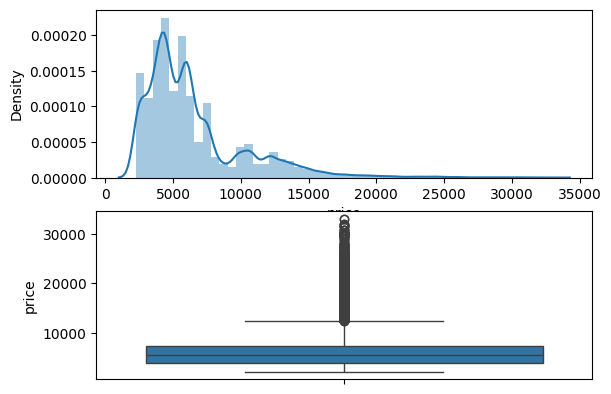

In [18]:
plot(final_df,'price')

In [51]:
final_df.head(10)
# train_df['airline'] = train_df['airline'].astype('object')
# airline_mapping={
#     0:'AirAsia',
#     1:'Air India',
#     2:'SpiceJet',
#     3:'Vistara',
#     4:'GO FIRST',
#     5:'Indigo'
# }
# train_df['airline'] = train_df['airline'].map(airline_mapping)

In [59]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300257 entries, 0 to 300256
Data columns (total 25 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   Unnamed: 0            300257 non-null  int64 
 1   airline               300257 non-null  object
 2   from                  300257 non-null  object
 3   to                    300257 non-null  object
 4   price                 300257 non-null  int64 
 5   class_category        300257 non-null  object
 6   class                 300257 non-null  int64 
 7   day                   300257 non-null  int64 
 8   month                 300257 non-null  int64 
 9   flight_no             300257 non-null  object
 10  route                 300257 non-null  object
 11  dep_hour              300257 non-null  int64 
 12  arr_hour              300257 non-null  int64 
 13  dep_period            300257 non-null  object
 14  arr_period            300257 non-null  object
 15  airline_index    

Seprating the dataset in X and Y columns

In [23]:
X=final_df.drop(columns=['price'],axis=1)
y=final_df['price']

In [27]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=4)

In [30]:
print(X.shape,X_train.shape,X_test.shape)

(53996, 24) (43196, 24) (10800, 24)


In [38]:
from sklearn.model_selection import RandomizedSearchCV

In [39]:
random_grid = {
    'n_estimators' : [100, 120, 150, 180, 200,220,280],
    'max_features':['auto','sqrt'],
    'max_depth':[5,10,15,20,25],
    }

In [126]:
final_df['airline'].unique()

array([4, 1, 5, 2, 3, 0])

In [127]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()

In [191]:
final_df['airline']=labelencoder.fit_transform(final_df['airline'])
final_df['from']=labelencoder.fit_transform(final_df['from'])
final_df['to']=labelencoder.fit_transform(final_df['to'])
final_df['class_category']=labelencoder.fit_transform(final_df['class_category'])
final_df['flight_no']=labelencoder.fit_transform(final_df['flight_no'])
final_df['route']=labelencoder.fit_transform(final_df['route'])
final_df['dep_period']=labelencoder.fit_transform(final_df['dep_period'])
final_df['stops_category']=labelencoder.fit_transform(final_df['stops_category'])
final_df['arr_period']=labelencoder.fit_transform(final_df['arr_period'])
final_df['arr_daytime_category']=labelencoder.fit_transform(final_df['arr_daytime_category'])
final_df['dep_daytime_category']=labelencoder.fit_transform(final_df['dep_daytime_category'])
final_df['month_category']=labelencoder.fit_transform(final_df['month_category'])





In [192]:
final_df.shape

(53996, 26)

In [193]:
final_df.head()

,Unnamed: 0,airline,from,to,price,class_category,class,day,month,flight_no,...,route_index,duration_in_min,stops,stops_category,arr_daytime,arr_daytime_category,dep_daytime,dep_daytime_category,month_category,Price
0,0,4,0,2,5953.0,0,0,11,2,361,...,14,130,0,2,0,1,1,0,0,5953.0
1,1,4,0,2,5953.0,0,0,11,2,346,...,14,140,0,2,1,0,1,0,0,5953.0
2,2,1,0,2,5956.0,0,0,11,2,309,...,14,130,0,2,1,0,0,1,0,5956.0
3,3,5,0,2,5955.0,0,0,11,2,421,...,14,135,0,2,1,0,1,0,0,5955.0
4,4,5,0,2,5955.0,0,0,11,2,415,...,14,140,0,2,1,0,1,0,0,5955.0


In [194]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53996 entries, 0 to 53995
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            53996 non-null  int64  
 1   airline               53996 non-null  int64  
 2   from                  53996 non-null  int64  
 3   to                    53996 non-null  int64  
 4   price                 53996 non-null  float64
 5   class_category        53996 non-null  int64  
 6   class                 53996 non-null  int64  
 7   day                   53996 non-null  object 
 8   month                 53996 non-null  int64  
 9   flight_no             53996 non-null  int64  
 10  route                 53996 non-null  int64  
 11  dep_hour              53996 non-null  int64  
 12  arr_hour              53996 non-null  int64  
 13  dep_period            53996 non-null  int64  
 14  arr_period            53996 non-null  int64  
 15  airline_index      

In [195]:
final_df.isnull().sum()

Unnamed: 0              0
airline                 0
from                    0
to                      0
price                   0
class_category          0
class                   0
day                     0
month                   0
flight_no               0
route                   0
dep_hour                0
arr_hour                0
dep_period              0
arr_period              0
airline_index           0
route_index             0
duration_in_min         0
stops                   0
stops_category          0
arr_daytime             0
arr_daytime_category    0
dep_daytime             0
dep_daytime_category    0
month_category          0
Price                   0
dtype: int64

In [196]:
def plot(data,col):
    fig,(ax1,ax2)=plt.subplots(2,1)
    sns.distplot(data[col],ax=ax1)
    sns.boxplot(data[col],ax=ax2)

<ipython-input-196-34770453dd8a>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col],ax=ax1)


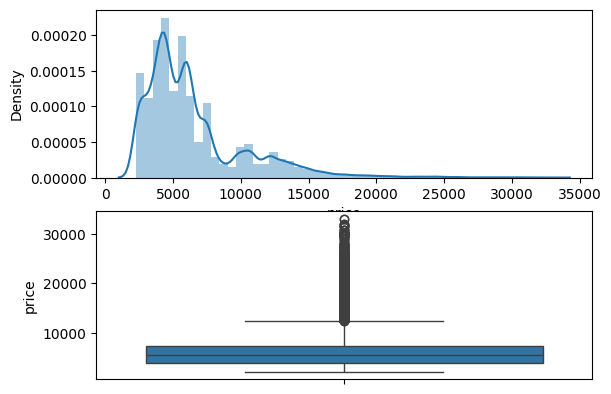

In [197]:
plot(final_df,'price')

In [198]:
final_df['Price']=np.where(final_df['price']>=40000,final_df['price'].median(),final_df['price'])

<ipython-input-196-34770453dd8a>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col],ax=ax1)


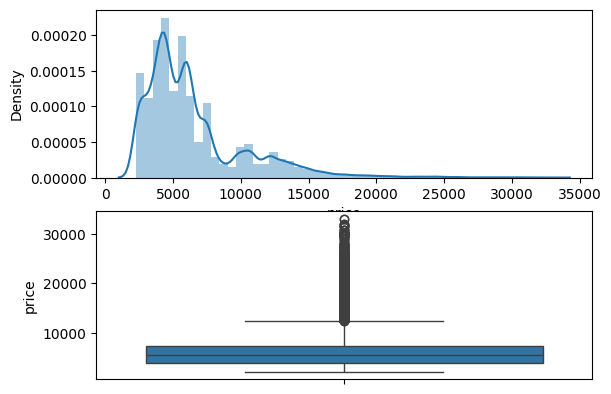

In [199]:
plot(final_df,'price')

In [200]:
final_df.head(20)

,Unnamed: 0,airline,from,to,price,class_category,class,day,month,flight_no,...,route_index,duration_in_min,stops,stops_category,arr_daytime,arr_daytime_category,dep_daytime,dep_daytime_category,month_category,Price
0,0,4,0,2,5953.0,0,0,11,2,361,...,14,130,0,2,0,1,1,0,0,5953.0
1,1,4,0,2,5953.0,0,0,11,2,346,...,14,140,0,2,1,0,1,0,0,5953.0
2,2,1,0,2,5956.0,0,0,11,2,309,...,14,130,0,2,1,0,0,1,0,5956.0
3,3,5,0,2,5955.0,0,0,11,2,421,...,14,135,0,2,1,0,1,0,0,5955.0
4,4,5,0,2,5955.0,0,0,11,2,415,...,14,140,0,2,1,0,1,0,0,5955.0
5,5,5,0,2,5955.0,0,0,11,2,411,...,14,140,0,2,1,0,1,0,0,5955.0
6,6,5,0,2,6060.0,0,0,11,2,407,...,14,125,0,2,1,0,1,0,0,6060.0
7,7,5,0,2,6060.0,0,0,11,2,412,...,14,130,0,2,1,0,1,0,0,6060.0
8,8,2,0,2,5954.0,0,0,11,2,273,...,14,130,0,2,1,0,1,0,0,5954.0
9,9,2,0,2,5954.0,0,0,11,2,274,...,14,135,0,2,1,0,1,0,0,5954.0


In [201]:
X=final_df.drop(columns=['Price'],axis=1)
y=final_df['Price']

In [202]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=4)

In [203]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor

In [204]:
def predict(ml_model):
    print('Model is: {}'.format(ml_model))
    model= ml_model.fit(X_train,y_train)
    print("Training score: {}".format(model.score(X_train,y_train)))
    predictions = model.predict(X_test)
    print("Predictions are: {}".format(predictions))
    print('\n')
    r2score=r2_score(y_test,predictions)
    print("r2 score is: {}".format(r2score))

    print('MAE:{}'.format(mean_absolute_error(y_test,predictions)))
    print('MSE:{}'.format(mean_squared_error(y_test,predictions)))
    print('RMSE:{}'.format(np.sqrt(mean_squared_error(y_test,predictions))))

    sns.distplot(y_test-predictions)

Model is: LinearRegression()
Training score: 1.0
Predictions are: [10575.  8134.  4205. ...  4939.  5702.  5954.]


r2 score is: 1.0
MAE:1.8916647672153043e-12
MSE:8.51364156850585e-24
RMSE:2.917814519208829e-12


<ipython-input-204-cfe941073500>:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-predictions)


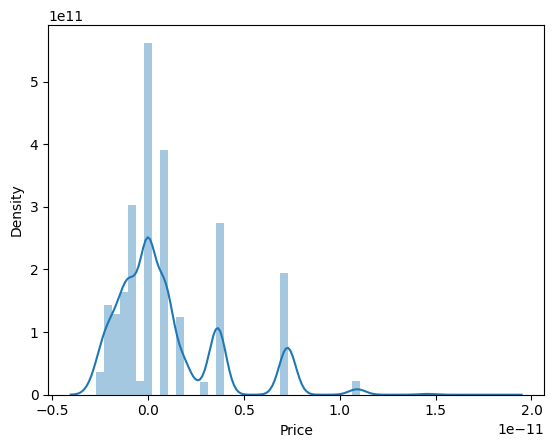

In [205]:
predict(LinearRegression())

Model is: RandomForestRegressor()
Training score: 0.9999996146362089
Predictions are: [10575.  8134.  4205. ...  4939.  5702.  5954.]


r2 score is: 0.9999986034487142
MAE:0.33791018518518723
MSE:19.81449219444455
RMSE:4.4513472336411315


<ipython-input-204-cfe941073500>:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-predictions)


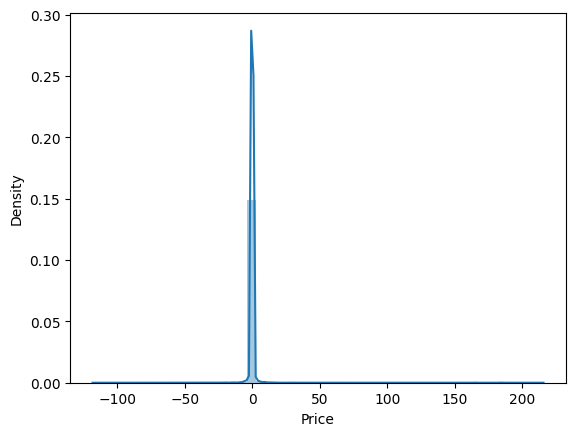

In [206]:
predict(RandomForestRegressor())


Model is: KNeighborsRegressor()
Training score: 0.9998474268623143
Predictions are: [10575.   8134.   4205.  ...  4875.4  5767.2  5954. ]


r2 score is: 0.9997900305222123
MAE:24.413611111111113
MSE:2979.080411111111
RMSE:54.5809528234082


<ipython-input-204-cfe941073500>:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-predictions)


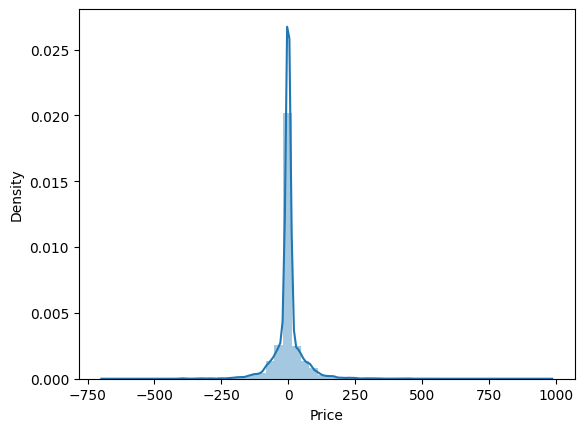

In [207]:
predict(KNeighborsRegressor())

Model is: SVR()
Training score: 0.5933556706418552
Predictions are: [7898.34117437 6748.09001609 4472.48713777 ... 4925.61433317 5470.92229049
 5971.62947583]


r2 score is: 0.5976375894708919
MAE:1404.533317215314
MSE:5708782.00014506
RMSE:2389.3057569396724


<ipython-input-204-cfe941073500>:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-predictions)


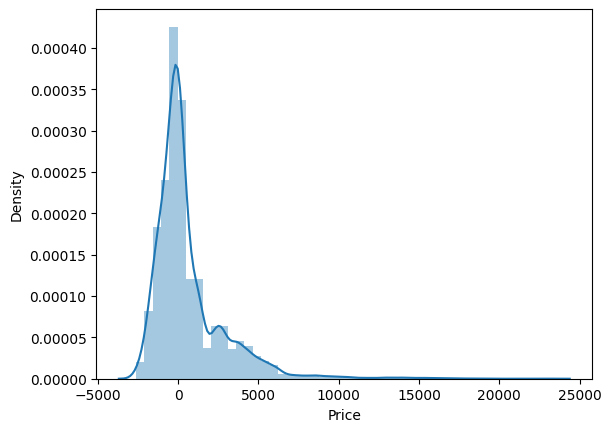

In [208]:
from sklearn.svm import SVR
predict(SVR())

Hypertunning the model

In [209]:
from sklearn.model_selection import RandomizedSearchCV

In [210]:
random_grid = {
    'n_estimators' : [100, 120, 150, 180, 200,220,280],
    'max_features':['auto','sqrt'],
    'max_depth':[5,10,15,20,25],
    }

In [211]:
rf=RandomForestRegressor()
rf_random=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,cv=3,verbose=2,n_jobs=-1,)

rf_random.fit(X_train,y_train)

# best parameter
rf_random.best_params_

Fitting 3 folds for each of 10 candidates, totalling 30 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


{'n_estimators': 120, 'max_features': 'auto', 'max_depth': 25}

In [212]:
rf_random.best_params_

{'n_estimators': 120, 'max_features': 'auto', 'max_depth': 25}

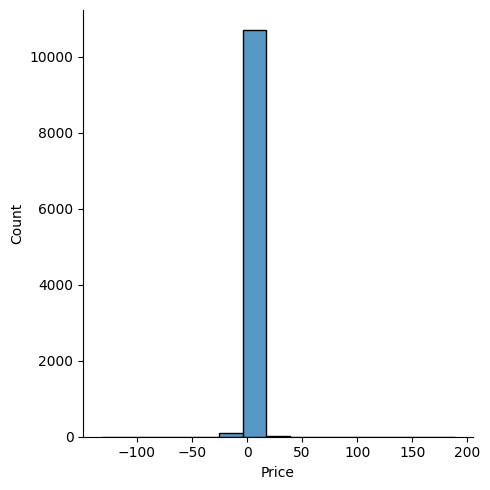

In [213]:
#predicting the values
prediction = rf_random.predict(X_test)

#distribution plot between actual value and predicted value
sns.displot(y_test-prediction)

In [214]:
r2_score(y_test,prediction)

0.9999988462724216